##### Problem Statement
Due to the growing need of educated and talented individuals, 
especially in developing countries, recruiting fresh graduates is a routine practice for organizations.
Conventional recruiting methods and selection processes can be prone to errors and in order to optimize the whole process, 
some innovative methods are needed.

Can you monitor past data and use machine learning to predict whether the candidate gets placed ?

#### importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data= pd.read_csv('Job_Placement_Data.csv')
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


#### Data Understanding

### column description
ssc_percentage = Senior secondary exams percentage (10th Grade)

ssc_board = Board of education for ssc exams 

hsc_percentage = Higher secondary exams percentage (12th Grade)

hsc_board = Board of education for hsc exams

hsc_subject = Subject of study for hsc

degree_percentage = Percentage of marks in undergrad degree

undergrad_degree = Undergrad degree majors

work_experience = Past work experience

emp_test_percentage = Aptitude test percentage

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [3]:
data.shape

(215, 13)

In [4]:
data.duplicated().sum()

0

### EDA

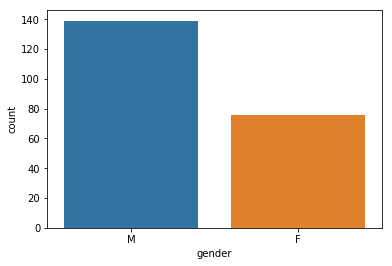

In [5]:
sns.countplot(data['gender'])

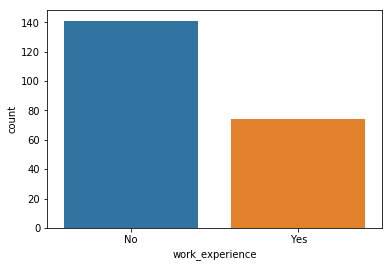

In [6]:
sns.countplot(data['work_experience'])

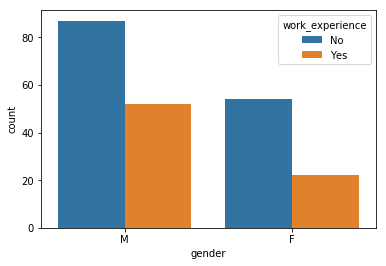

In [7]:
sns.countplot(data=data, x="gender", hue="work_experience")

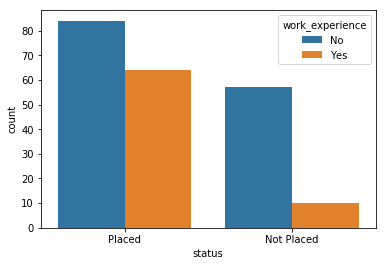

In [8]:
sns.countplot(data=data, x="status", hue="work_experience")

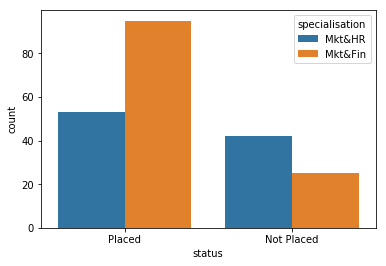

In [9]:
sns.countplot(data=data, x="status", hue="specialisation")

In [10]:
data.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

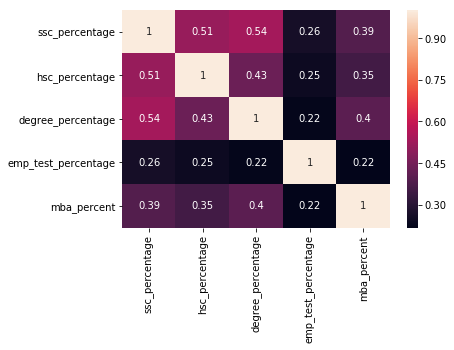

In [11]:
sns.heatmap(data.corr(),annot=True)

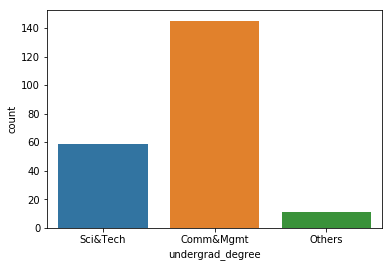

In [12]:
sns.countplot(data['undergrad_degree'])

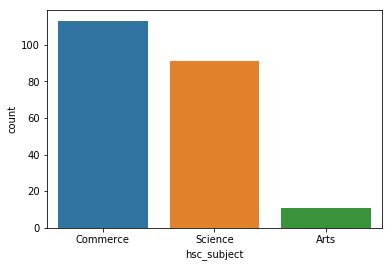

In [13]:
sns.countplot(data['hsc_subject'])

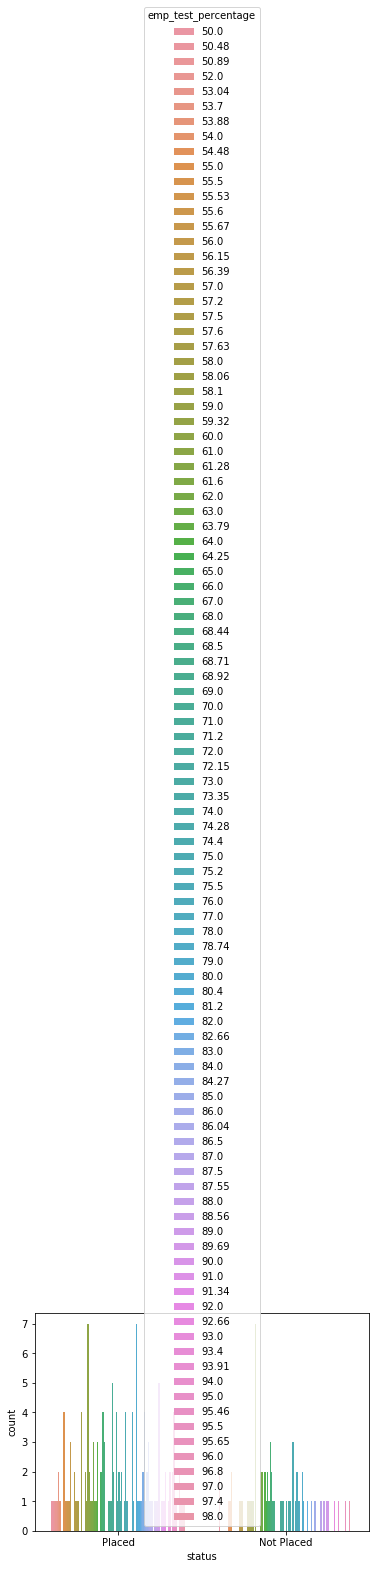

In [14]:
sns.countplot(data=data, x="status", hue="emp_test_percentage")

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


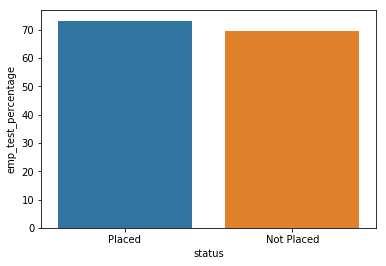

In [15]:
data.groupby('status', as_index=False)['emp_test_percentage'].mean()
sns.barplot('status', 'emp_test_percentage', data=data, ci=False)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


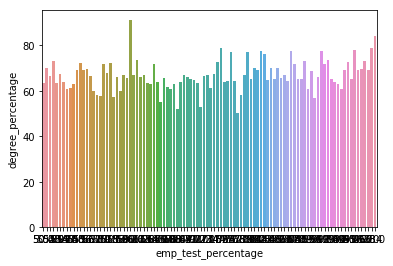

In [16]:
data.groupby('emp_test_percentage', as_index=False)['degree_percentage'].mean()
sns.barplot('emp_test_percentage', 'degree_percentage', data=data, ci=False)

In [17]:
data['hsc_board'].value_counts()

Others     131
Central     84
Name: hsc_board, dtype: int64

In [18]:
data.drop(['ssc_percentage','ssc_board','hsc_percentage','hsc_board','hsc_subject',], axis=1,inplace=True)

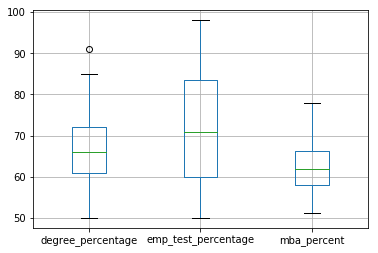

In [19]:
df = pd.DataFrame(data = data, columns = ['gender', 'degree_percentage', 'undergrad_degree', 'work_experience','emp_test_percentage', 'specialisation', 'mba_percent', 'status'])
df.boxplot()

In [20]:
data.columns

Index(['gender', 'degree_percentage', 'undergrad_degree', 'work_experience',
       'emp_test_percentage', 'specialisation', 'mba_percent', 'status'],
      dtype='object')

In [21]:
data._get_numeric_data().columns

Index(['degree_percentage', 'emp_test_percentage', 'mba_percent'], dtype='object')

#### i will be classifying those that got jobs based on undergrad_degree, work_ experience, emp_test_percentage,specialisation,gender,degree+percentage,mba_percent,and maybe subject

In [22]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data['undergrad_degree'] = le.fit_transform(data['undergrad_degree'])
data['work_experience'] = le.fit_transform(data['work_experience'])
data['specialisation'] = le.fit_transform(data['specialisation'])
data['gender'] = le.fit_transform(data['gender'])
data['status'] = le.fit_transform(data['status'])

pd.get_dummies(data,columns=['undergrad_degree','work_experience','specialisation','gender','status'],drop_first=True)

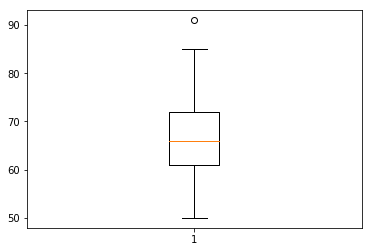

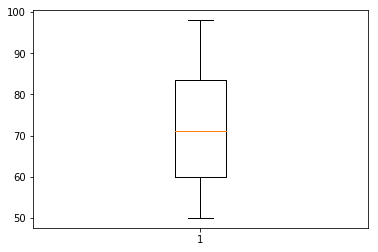

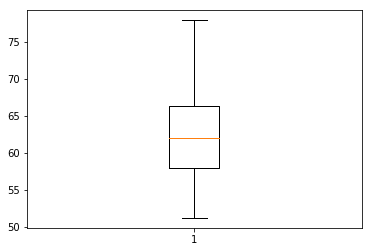

In [23]:
int_col=['degree_percentage', 'emp_test_percentage', 'mba_percent']
for i in int_col:
    plt.figure()
    plt.boxplot(data[i])

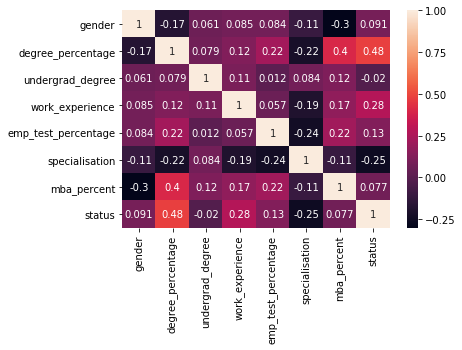

In [24]:
sns.heatmap(data.corr(),annot=True)#corr is from-1to +1

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 93.0651766004415)

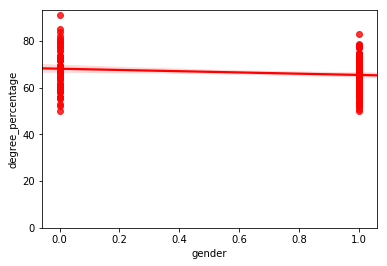

In [28]:
sns.regplot(x="gender", y='degree_percentage', color="red", data=data)
plt.ylim(0,)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 93.0651766004415)

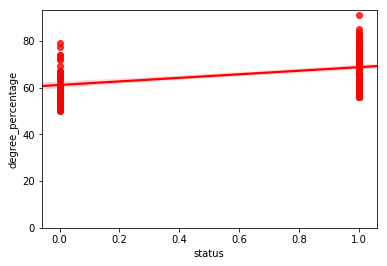

In [29]:
sns.regplot(x="status", y='degree_percentage', color="red", data=data)
plt.ylim(0,)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1.1158422939068113)

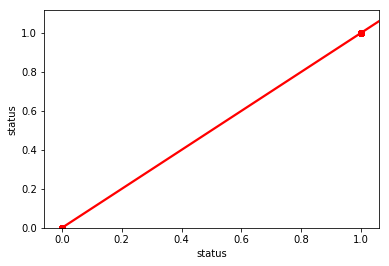

In [30]:
sns.regplot(x="status", y='status', color="red", data=data)
plt.ylim(0,)

ValueError: `bins` must increase monotonically, when an array

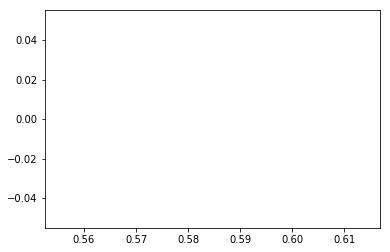

In [40]:
#to check if our graph looks like a normal distribution
sns.distplot(y_test-grid_pred)

In [31]:
#object cannot have outlier nor correlation,so if you change it to dummy you cant get correlation
'''the data correlated is between staus and degree percentage,mba_percent and degree_percentage,work_experience and status,
emp_test and degree_percentage,emp_test_percentage and degree_percentage'''
 """data is scaled when:So if the data in any conditions has data points far from each other, 
scaling is a technique to make them closer to each other or in simpler words, we can say
that the scaling is used for making data points generalized so that the distance between them will be lower."""

IndentationError: unexpected indent (<ipython-input-31-87566b564aa4>, line 4)

In [32]:
from sklearn.model_selection import train_test_split
x=data.drop(['status'],axis=1)
y= data['status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [33]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
svc= SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [34]:
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')

Accuracy score: 0.5846153846153846


In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0 27]
 [ 0 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.58      1.00      0.74        38

    accuracy                           0.58        65
   macro avg       0.29      0.50      0.37        65
weighted avg       0.34      0.58      0.43        65



C:\Users\Honour Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Honour Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Honour Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import catboost as cb 
mcb = cb.CatBoostClassifier()
mcb.fit(x_train, y_train)
print(mcb)

Learning rate set to 0.004583
0:	learn: 0.6897625	total: 96.9ms	remaining: 1m 36s
1:	learn: 0.6865616	total: 103ms	remaining: 51.2s
2:	learn: 0.6833386	total: 108ms	remaining: 35.8s
3:	learn: 0.6795565	total: 114ms	remaining: 28.4s
4:	learn: 0.6772344	total: 119ms	remaining: 23.7s
5:	learn: 0.6739997	total: 125ms	remaining: 20.7s
6:	learn: 0.6709278	total: 130ms	remaining: 18.5s
7:	learn: 0.6681494	total: 135ms	remaining: 16.7s
8:	learn: 0.6655668	total: 142ms	remaining: 15.7s
9:	learn: 0.6635165	total: 146ms	remaining: 14.4s
10:	learn: 0.6601602	total: 152ms	remaining: 13.7s
11:	learn: 0.6569506	total: 158ms	remaining: 13s
12:	learn: 0.6541386	total: 165ms	remaining: 12.5s
13:	learn: 0.6509861	total: 192ms	remaining: 13.5s
14:	learn: 0.6471736	total: 198ms	remaining: 13s
15:	learn: 0.6444456	total: 203ms	remaining: 12.5s
16:	learn: 0.6416644	total: 208ms	remaining: 12s
17:	learn: 0.6387740	total: 213ms	remaining: 11.6s
18:	learn: 0.6354931	total: 219ms	remaining: 11.3s
19:	learn: 0.63

182:	learn: 0.3737412	total: 1.16s	remaining: 5.18s
183:	learn: 0.3726064	total: 1.17s	remaining: 5.18s
184:	learn: 0.3717197	total: 1.17s	remaining: 5.17s
185:	learn: 0.3709731	total: 1.18s	remaining: 5.16s
186:	learn: 0.3699430	total: 1.18s	remaining: 5.14s
187:	learn: 0.3691587	total: 1.19s	remaining: 5.13s
188:	learn: 0.3682305	total: 1.19s	remaining: 5.12s
189:	learn: 0.3674917	total: 1.2s	remaining: 5.11s
190:	learn: 0.3671042	total: 1.2s	remaining: 5.09s
191:	learn: 0.3662809	total: 1.21s	remaining: 5.08s
192:	learn: 0.3654516	total: 1.21s	remaining: 5.07s
193:	learn: 0.3647443	total: 1.22s	remaining: 5.06s
194:	learn: 0.3638634	total: 1.22s	remaining: 5.05s
195:	learn: 0.3631933	total: 1.23s	remaining: 5.05s
196:	learn: 0.3621678	total: 1.24s	remaining: 5.05s
197:	learn: 0.3613291	total: 1.25s	remaining: 5.04s
198:	learn: 0.3605303	total: 1.25s	remaining: 5.04s
199:	learn: 0.3596461	total: 1.26s	remaining: 5.03s
200:	learn: 0.3585931	total: 1.26s	remaining: 5.02s
201:	learn: 0.

360:	learn: 0.2614932	total: 1.98s	remaining: 3.5s
361:	learn: 0.2609926	total: 1.98s	remaining: 3.49s
362:	learn: 0.2604520	total: 1.99s	remaining: 3.49s
363:	learn: 0.2601051	total: 1.99s	remaining: 3.48s
364:	learn: 0.2598709	total: 2s	remaining: 3.47s
365:	learn: 0.2593628	total: 2s	remaining: 3.47s
366:	learn: 0.2589880	total: 2.01s	remaining: 3.46s
367:	learn: 0.2584928	total: 2.01s	remaining: 3.45s
368:	learn: 0.2580714	total: 2.02s	remaining: 3.45s
369:	learn: 0.2576584	total: 2.02s	remaining: 3.44s
370:	learn: 0.2571889	total: 2.03s	remaining: 3.44s
371:	learn: 0.2566173	total: 2.03s	remaining: 3.43s
372:	learn: 0.2562312	total: 2.04s	remaining: 3.43s
373:	learn: 0.2557746	total: 2.04s	remaining: 3.42s
374:	learn: 0.2552341	total: 2.05s	remaining: 3.42s
375:	learn: 0.2549503	total: 2.05s	remaining: 3.41s
376:	learn: 0.2542940	total: 2.06s	remaining: 3.4s
377:	learn: 0.2540154	total: 2.06s	remaining: 3.4s
378:	learn: 0.2535389	total: 2.07s	remaining: 3.39s
379:	learn: 0.2532497

526:	learn: 0.2060081	total: 2.62s	remaining: 2.35s
527:	learn: 0.2056063	total: 2.62s	remaining: 2.35s
528:	learn: 0.2053269	total: 2.63s	remaining: 2.34s
529:	learn: 0.2052917	total: 2.63s	remaining: 2.33s
530:	learn: 0.2050920	total: 2.64s	remaining: 2.33s
531:	learn: 0.2048728	total: 2.64s	remaining: 2.32s
532:	learn: 0.2046062	total: 2.65s	remaining: 2.32s
533:	learn: 0.2045239	total: 2.65s	remaining: 2.31s
534:	learn: 0.2041283	total: 2.65s	remaining: 2.3s
535:	learn: 0.2038032	total: 2.66s	remaining: 2.3s
536:	learn: 0.2037219	total: 2.66s	remaining: 2.29s
537:	learn: 0.2034890	total: 2.66s	remaining: 2.29s
538:	learn: 0.2032568	total: 2.7s	remaining: 2.31s
539:	learn: 0.2030089	total: 2.71s	remaining: 2.31s
540:	learn: 0.2027753	total: 2.71s	remaining: 2.3s
541:	learn: 0.2024401	total: 2.72s	remaining: 2.3s
542:	learn: 0.2020903	total: 2.73s	remaining: 2.29s
543:	learn: 0.2018762	total: 2.73s	remaining: 2.29s
544:	learn: 0.2015684	total: 2.73s	remaining: 2.28s
545:	learn: 0.201

721:	learn: 0.1633618	total: 3.29s	remaining: 1.27s
722:	learn: 0.1632614	total: 3.29s	remaining: 1.26s
723:	learn: 0.1630411	total: 3.3s	remaining: 1.26s
724:	learn: 0.1628447	total: 3.3s	remaining: 1.25s
725:	learn: 0.1627746	total: 3.3s	remaining: 1.25s
726:	learn: 0.1625608	total: 3.31s	remaining: 1.24s
727:	learn: 0.1623444	total: 3.31s	remaining: 1.24s
728:	learn: 0.1621117	total: 3.31s	remaining: 1.23s
729:	learn: 0.1618882	total: 3.32s	remaining: 1.23s
730:	learn: 0.1617614	total: 3.32s	remaining: 1.22s
731:	learn: 0.1615453	total: 3.32s	remaining: 1.22s
732:	learn: 0.1613662	total: 3.33s	remaining: 1.21s
733:	learn: 0.1611448	total: 3.33s	remaining: 1.21s
734:	learn: 0.1609487	total: 3.33s	remaining: 1.2s
735:	learn: 0.1607784	total: 3.34s	remaining: 1.2s
736:	learn: 0.1605259	total: 3.34s	remaining: 1.19s
737:	learn: 0.1602525	total: 3.35s	remaining: 1.19s
738:	learn: 0.1601406	total: 3.35s	remaining: 1.18s
739:	learn: 0.1600112	total: 3.35s	remaining: 1.18s
740:	learn: 0.159

887:	learn: 0.1355930	total: 3.78s	remaining: 477ms
888:	learn: 0.1353909	total: 3.78s	remaining: 472ms
889:	learn: 0.1351796	total: 3.79s	remaining: 468ms
890:	learn: 0.1351081	total: 3.79s	remaining: 464ms
891:	learn: 0.1349935	total: 3.79s	remaining: 459ms
892:	learn: 0.1348413	total: 3.79s	remaining: 455ms
893:	learn: 0.1347127	total: 3.8s	remaining: 450ms
894:	learn: 0.1345129	total: 3.8s	remaining: 446ms
895:	learn: 0.1343539	total: 3.81s	remaining: 442ms
896:	learn: 0.1341975	total: 3.81s	remaining: 437ms
897:	learn: 0.1340171	total: 3.81s	remaining: 433ms
898:	learn: 0.1338744	total: 3.81s	remaining: 429ms
899:	learn: 0.1337155	total: 3.82s	remaining: 424ms
900:	learn: 0.1336387	total: 3.82s	remaining: 420ms
901:	learn: 0.1335521	total: 3.83s	remaining: 416ms
902:	learn: 0.1334438	total: 3.83s	remaining: 411ms
903:	learn: 0.1333111	total: 3.83s	remaining: 407ms
904:	learn: 0.1331536	total: 3.83s	remaining: 402ms
905:	learn: 0.1330330	total: 3.83s	remaining: 398ms
906:	learn: 0.

In [37]:
y_pred = mcb.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')

Accuracy score: 0.6461538461538462


In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8 19]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.67      0.30      0.41        27
           1       0.64      0.89      0.75        38

    accuracy                           0.65        65
   macro avg       0.65      0.60      0.58        65
weighted avg       0.65      0.65      0.61        65



In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid= GridSearchCV(SVC(),param_grid,refit= True,verbose=2)#verbose= 2 means one line per epoch,epoch means iterations
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [41]:
grid_pred= grid.predict(x_test)
print(f'Accuracy Score: {metrics.accuracy_score(y_test,grid_pred)}')

Accuracy Score: 0.6615384615384615


In [42]:
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[ 6 21]
 [ 1 37]]
              precision    recall  f1-score   support

           0       0.86      0.22      0.35        27
           1       0.64      0.97      0.77        38

    accuracy                           0.66        65
   macro avg       0.75      0.60      0.56        65
weighted avg       0.73      0.66      0.60        65



from sklearn.model_selection import cross_val_score
print(cross_val_score(y_test, grid_pred))#used it wrongly not particularly necessary

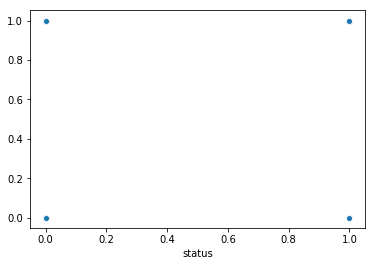

In [44]:
sns.scatterplot(y_test,grid_pred)#how scatter plot isnt linear pfft

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


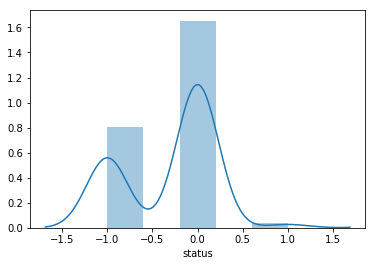

In [45]:
sns.distplot(y_test-grid_pred)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


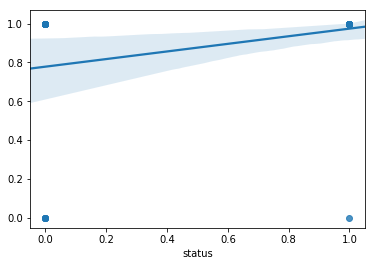

In [47]:
sns.regplot(y_test,grid_pred)

### This model isnt the best

In [48]:
#open a file to store your data
import pickle
file=open('job_placement_model.pkl','wb')
#dump information to the file
pickle.dump(grid, file)